In [165]:
import qiskit as qk

# Creating Qubits
q = qk.QuantumRegister(2)
# Creating Classical Bits
c = qk.ClassicalRegister(2)

In [166]:
circuit = qk.QuantumCircuit(q, c)
# Hadamard Gate on the first Qubit
circuit.h(q[0])
# CNOT Gate on the first and second Qubits
circuit.cx(q[0], q[1])
# Measuring the Qubits
circuit.measure(q, c)
print(circuit)

      ┌───┐     ┌─┐   
q2_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q2_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c2: 2/═══════════╩══╩═
                 0  1 


In [181]:
qc = qk.QuantumCircuit(1)

In [185]:
qc.draw()

q_0:

In [118]:
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit import BasicAer, Aer, execute
from qiskit.utils import QuantumInstance

In [119]:
zz_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear', insert_barriers=True)

In [120]:
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

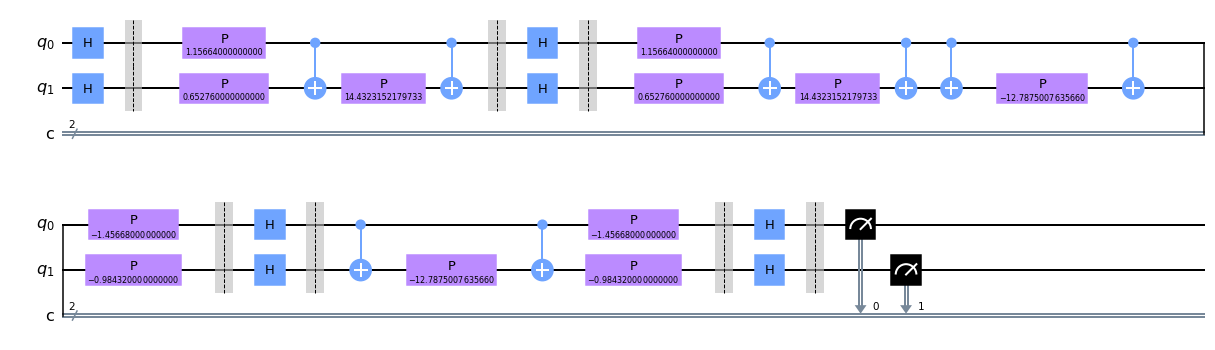

In [121]:
zz_circuit = zz_kernel.construct_circuit(np.array([0.57832, 0.32638]), np.array([0.72834, 0.49216]))
zz_circuit.decompose().decompose().draw(output='mpl')

In [122]:
prep = PauliFeatureMap(2, reps=1, paulis=['ZZ'])
print(prep)

     ┌───┐                                           
q_0: ┤ H ├──■─────────────────────────────────────■──
     ├───┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
q_1: ┤ H ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
     └───┘└───┘└───────────────────────────────┘└───┘


In [94]:
import functools

import numpy as np


def self_product(x: np.ndarray) -> float:
    """
    Define a function map from R^n to R.

    Args:
        x: data

    Returns:
        float: the mapped value
    """
    coeff = x[0] if len(x) == 1 else \
        functools.reduce(lambda m, n: m * n, np.pi - x)
    return coeff

In [97]:
a = np.array([1,4,5])
self_product(a)

3.4164196235102384

In [102]:
b =  np.pi-a
b[0]+b[1]+b[2]

-0.5752220392306207

In [98]:
functools.reduce?

In [ ]:
from quantum_svm.quantum.qubit import Qubit

qubit0 = Qubit(bit='0')
qubit0

qubit0.get_statevector()

qubit00 = Qubit(bit='11')
qubit00



from quantum_svm.quantum.quantum_gates import Hadamard
import numpy as np

%load_ext autoreload

%autoreload 2

H = Hadamard(0,1)

H.apply(qubit0.get_statevector())

np.dot(qubit0.get_statevector(), hadamard_gate())

H.apply_2(qubit0.get_statevector())

st_vec = qubit00.get_statevector().reshape((2, 2, 2 ** 0)).astype(np.complex_)
hadamard_gate() @ st_vec

st_vec

from quantum_svm.quantum.utils import hadamard_gate

hadamard_gate()[1,1]





In [152]:
# adopted form https://medium.com/analytics-vidhya/python-program-to-convert-floating-point-decimal-to-binary-485470421743
    
def float_bin(number, places = 3):
  
    # split() seperates whole number and decimal 
    # part and stores it in two seperate variables
    whole, dec = str(number).split(".")
  
    # Convert both whole number and decimal  
    # part from string type to integer type
    whole = int(whole)
    dec = int (dec)
  
    # Convert the whole number part to it's
    # respective binary form and remove the
    # "0b" from it.
    res = bin(whole).lstrip("0b") + "."
  
    # Iterate the number of times, we want
    # the number of decimal places to be
    for x in range(places):
  
        # Multiply the decimal value by 2 
        # and seperate the whole number part
        # and decimal part
        whole, dec = str((decimal_converter(dec)) * 2).split(".")
  
        # Convert the decimal part
        # to integer again
        dec = int(dec)
  
        # Keep adding the integer parts 
        # receive to the result variable
        res += whole
  
    return res

def decimal_converter(num): 
    while num > 1:
        num /= 10
    return num

In [154]:
float_bin(1.2)

'1.001'

In [155]:
def dec2bin(num):
    """"
    Function to convert a floating point decimal number to binary number
    """
    global whole_list
    global dec_list
    whole, dec = str(num).split('.')
    whole = int(whole)
    dec = int(dec)
    counter = 1
    
    while (whole / 2 >= 1):
            i = int(whole % 2)
            whole_list.append(i)
            whole /= 2
            
    decproduct = dec      
    while (counter <= places):
        decproduct = decproduct * (10**-(len(str(decproduct))))
        decproduct *= 2
        decwhole, decdec = str(decproduct).split('.')
        decwhole = int(decwhole)
        decdec = int(decdec)
        dec_list.append(decwhole)
        decproduct = decdec
        counter += 1
        
whole_list = []
dec_list = []
try:
    num = float(input('Enter a floating point decimal number: '))
    
except(ValueError):
    print('Please enter a valid floating point decimal')

try:
    places = int(input('Enter the number of decimal places in the result: '))
    dec2bin(num)
    if(len(whole_list) > 1):
        whole_list.reverse()
    whole_list.insert(0, 1)
    
    aster = '*'
    print(aster * 60)
    
    print('The binary number of {0} is:' .format(num))
    print(*whole_list, end =' ')
    print('.', end = ' ')
    print(*dec_list)
    
    print(aster * 60)
        
except(ValueError):
    print('Please enter a valid integer number for places')

Enter a floating point decimal number: 1.1
Enter the number of decimal places in the result: 15
************************************************************
The binary number of 1.1 is:
1 . 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0
************************************************************


In [169]:

# Wire 0 is right-most wire
cnot = CNOT(wires=[0, 2], target=0, n=3)
x = PauliX(wire=2, n=3)

cnot._build_naive_op_mat()
x._build_naive_op_mat()

v = np.array([1, 2, 3, 4, 5, 6, 7, 8])

cnot_v = cnot.apply(v)
cnot_v_naive = cnot.naive_apply(v)

x_v = x.apply(v)
x_v_naive = x.naive_apply(v)

print(f"v: {v}")
print(f"cnot_v: {cnot_v}")
print(f"cnot_v_naive: {cnot_v_naive.real}")
print(f"x_v: {x_v}")
print(f"x_v_naive: {x_v_naive.real}")

bell_circuit = Circuit([
    Hadamard(0, 2),
    CNOT([0, 1], 1, 2)
], 2)
v = np.array([1, 0, 0, 0])
bell_00 = bell_circuit.apply(v)
print(f"bell_00: {bell_00}")

v: [1 2 3 4 5 6 7 8]
cnot_v: [1.+0.j 2.+0.j 3.+0.j 4.+0.j 6.+0.j 5.+0.j 8.+0.j 7.+0.j]
cnot_v_naive: [1. 2. 3. 4. 6. 5. 8. 7.]
x_v: [5.+0.j 6.+0.j 7.+0.j 8.+0.j 1.+0.j 2.+0.j 3.+0.j 4.+0.j]
x_v_naive: [5. 6. 7. 8. 1. 2. 3. 4.]
bell_00: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [1]:
from quantum_svm.quantum.qubit import Qubit

In [2]:
qubit0 = Qubit(bit='0')
qubit0

|0> = 

[[1.+0.j]
 [0.+0.j]]

In [3]:
qubit0.get_statevector()

array([[1.+0.j, 0.+0.j]])

In [4]:
qubit00 = Qubit(bit='11')
qubit00

|11> = 

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]]

In [82]:
from quantum_svm.quantum.quantum_gates import Hadamard
import numpy as np

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
H = Hadamard(0,1)

In [85]:
H.apply(qubit0.get_statevector())

(1, 2)
(1, 2, 1)
[1.+0.j]
[0.+0.j]


array([0.70710678+0.j, 0.70710678+0.j])

In [86]:
np.dot(qubit0.get_statevector(), hadamard_gate())

array([[0.70710678+0.j, 0.70710678+0.j]])

In [76]:
H.apply_2(qubit0.get_statevector())

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [77]:
st_vec = qubit00.get_statevector().reshape((2, 2, 2 ** 0)).astype(np.complex_)
hadamard_gate() @ st_vec

array([[[ 0.        +0.j],
        [ 0.        +0.j]],

       [[ 0.70710678+0.j],
        [-0.70710678+0.j]]])

In [57]:
st_vec

array([[[1.+0.j],
        [0.+0.j]]])

In [58]:
from quantum_svm.quantum.utils import hadamard_gate

In [60]:
hadamard_gate()[1,1]

(0.7071067811865475+0j)

array([[0.70710678+0.j, 0.70710678+0.j]])